### Zadanie 1 Porównać naive_multiplication, better_multiplication, BLAS

In [1]:
# mnożenie macierzy - wersja naiwna
function naive_multiplication(A,B)
    C = zeros(Float64, size(A,1), size(B,2))
    for i=1:size(A,1)
        for j=1:size(B,2)
            for k=1:size(A,2)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    C
end

naive_multiplication (generic function with 1 method)

In [2]:
# poprawiona funkcja korzytająca z powyższego oraz z faktu, że
# można zmieniać kolejność operacji dodawania (a co za tym idzie kolejnosc petli).
function better_multiplication(A, B)
    C = zeros(Float64, size(A,1), size(B,2))
    for j=1:size(B,2)
        for k=1:size(A,2)
            for i=1:size(A,1)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    C
end

better_multiplication (generic function with 1 method)

In [3]:
A = rand(1:100, 5, 5)

5×5 Array{Int64,2}:
 91   5  58  63  88
 95  71  46  56  69
 22  13  98  42   5
 39  60  91  28  21
 72  21  13  52  80

In [4]:
naive_times = Array{Float64}(undef, 10, 10)
better_times = Array{Float64}(undef, 10, 10)
blas_times = Array{Float64}(undef, 10, 10)
for _size in 50:50:500
    for i = 1:10
        A = rand(1:100, _size, _size)
        B = rand(1:100, _size, _size)
        naive_times[i, convert(Int64, _size / 50)] = @elapsed (naive_multiplication(A, B))
        better_times[i, convert(Int64, _size / 50)] =  @elapsed (better_multiplication(A, B))
        blas_times[i, convert(Int64, _size / 50)] =  @elapsed (A * B)
    end
end
naive_times

10×10 Array{Float64,2}:
 0.0360302  0.0029096  0.0104398  0.0267636  …  0.212758  0.293688  0.414365
 0.0003759  0.0036739  0.0111658  0.027188      0.209278  0.303843  0.406475
 0.0003779  0.0032756  0.0110309  0.026413      0.205663  0.300287  0.408109
 0.0002692  0.0033607  0.010639   0.0280596     0.208836  0.280763  0.420682
 0.0003684  0.0031024  0.0104475  0.0271897     0.241936  0.289079  0.402358
 0.0002822  0.0035118  0.0103947  0.0270728  …  0.226617  0.304277  0.420812
 0.0002726  0.0027285  0.0110081  0.0263271     0.212669  0.304958  0.394755
 0.0004275  0.0026933  0.00987    0.0295555     0.193309  0.297489  0.455159
 0.0003054  0.0028907  0.0103565  0.0257853     0.198905  0.300997  0.411403
 0.0002737  0.0028795  0.0122927  0.0283424     0.208742  0.290787  0.446676

In [5]:
blas_times

10×10 Array{Float64,2}:
 1.1904     0.0008763  0.0021038  …  0.0349424  0.0469816  0.0652134
 8.11e-5    0.0005088  0.0023597     0.0374424  0.0538493  0.0617761
 7.81e-5    0.0006245  0.0018773     0.0342202  0.0469131  0.0632235
 7.98e-5    0.0005962  0.0020852     0.039491   0.045795   0.0614823
 8.26e-5    0.0008464  0.0018178     0.0367126  0.0486035  0.0671286
 0.0001571  0.000724   0.0023115  …  0.0346244  0.0484085  0.0616889
 7.79e-5    0.0005803  0.0022113     0.031947   0.0449385  0.0691709
 0.0001204  0.0005888  0.0019646     0.0327997  0.0478568  0.0637174
 8.71e-5    0.0005847  0.00184       0.0312533  0.0482176  0.0687074
 8.57e-5    0.0006267  0.0018839     0.0412195  0.0464037  0.067679

In [6]:
_naivet = Float64[]
_bettert = Float64[]
_blast = Float64[]
_sizes = Int64[]
for i = 1:10
    for j = 1:10
        push!(_naivet, naive_times[i, j])
        push!(_bettert, better_times[i, j])
        push!(_blast, blas_times[i, j])
        push!(_sizes, j * 5)
    end
end

In [7]:
using DataFrames
naive_frame = DataFrame(TYPE = ["Naive" for i in 1: 100], 
               SIZE = _sizes,
               TIME = _naivet
               ) 
better_frame = DataFrame(TYPE = ["Better" for i in 1: 100], 
               SIZE = _sizes,
               TIME = _bettert
               ) 
blas_frame = DataFrame(TYPE = ["BLAS" for i in 1: 100], 
               SIZE = _sizes,
               TIME = _blast
               ) 

,TYPE,SIZE,TIME
,String,Int64,Float64
1,BLAS,5,1.1904
2,BLAS,10,0.0008763
3,BLAS,15,0.0021038
4,BLAS,20,0.0044592
5,BLAS,25,0.0088509
6,BLAS,30,0.0154876
7,BLAS,35,0.0234354
8,BLAS,40,0.0349424
9,BLAS,45,0.0469816


In [8]:
using Statistics
# Naive
naive_size_grouped = groupby(naive_frame, :SIZE)
naive_avrg = combine(naive_size_grouped, :TIME => mean => :mean_time)
naive_std = combine(naive_size_grouped, :TIME => std => :std_time)
# Better
better_size_grouped = groupby(better_frame, :SIZE)
better_avrg = combine(better_size_grouped, :TIME => mean => :mean_time)
better_std = combine(better_size_grouped, :TIME => std => :std_time)
# Blas
blas_size_grouped = groupby(blas_frame, :SIZE)
blas_avrg = combine(blas_size_grouped, :TIME => mean => :mean_time)
blas_std = combine(blas_size_grouped, :TIME => std => :std_time)

,SIZE,std_time
,Int64,Float64
1,5,0.376408
2,10,0.000121029
3,15,0.000199157
4,20,0.000286475
5,25,0.000433118
6,30,0.00102906
7,35,0.00116087
8,40,0.00324101
9,45,0.00243588


   Updating registry at `/opt/julia/registries/General`
######################################################################### 100.0%
  Resolving package versions...
No Changes to `/opt/julia/environments/v1.5/Project.toml`
No Changes to `/opt/julia/environments/v1.5/Manifest.toml`


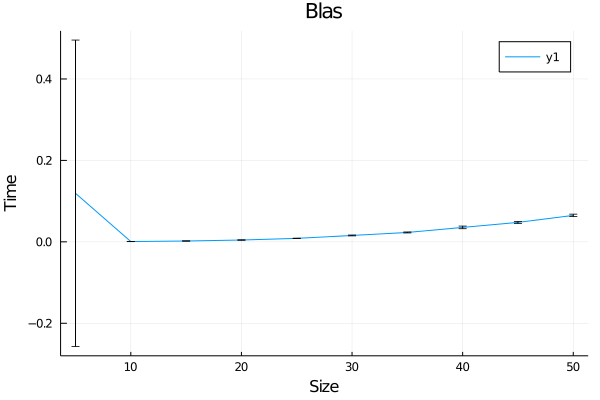

In [9]:
import Pkg; Pkg.add("Plots")
using Plots
# Lagrange
naive_std_arr = convert(Array, naive_std.std_time)
plot_naive = plot(naive_avrg.SIZE, naive_avrg.mean_time, yerr=naive_std_arr, xlabel = "Size", ylabel="Time",title = "Naive")
# Newton
better_std_arr = convert(Array, better_std.std_time)
plot_better = plot(better_avrg.SIZE, better_avrg.mean_time, yerr=better_std_arr, xlabel = "Size", ylabel="Time",title = "Better")
# Library
blas_std_arr = convert(Array, blas_std.std_time)
plot_blas = plot(blas_avrg.SIZE, blas_avrg.mean_time, yerr=blas_std_arr, xlabel = "Size", ylabel="Time",title = "Blas")

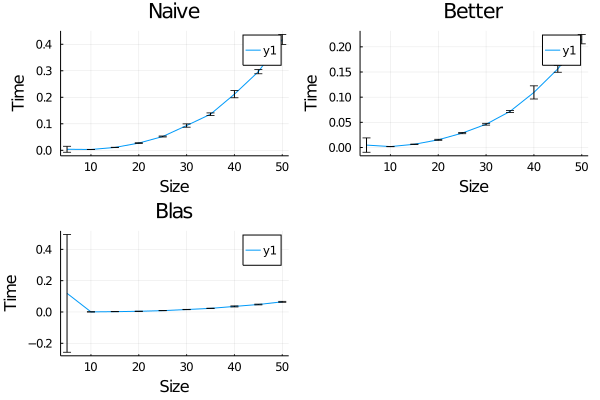

In [10]:
plot(plot_naive, plot_better, plot_blas, layout=3)

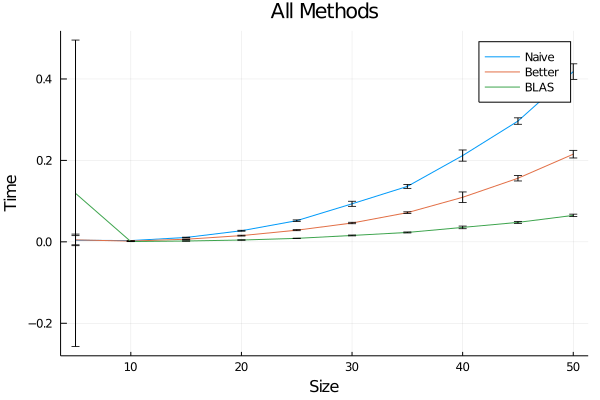

In [11]:
plot(naive_avrg.SIZE, naive_avrg.mean_time, yerr=naive_std_arr, xlabel = "Size", ylabel="Time",title = "Naive", label="Naive")
plot!(better_avrg.SIZE, better_avrg.mean_time, yerr=better_std_arr, xlabel = "Size", ylabel="Time",title = "Better", label="Better")
plot!(blas_avrg.SIZE, blas_avrg.mean_time, yerr=blas_std_arr, xlabel = "Size", ylabel="Time",title = "All Methods", label="BLAS")

### Zadanie 2 Napisać w języku C: naiwne mnożenie macierzy, ulepszona wersje mnozenia macierzy, porownac z wbudowana funkcja BLAS

```c
#include <stdio.h>
#include <stdlib.h>
#include <time.h>
#include <gsl/gsl_blas.h>

void naive_multiply(int N, int **mat1, int **mat2, int **res)
{
    for (int i = 0; i < N; i++) {
        for (int j = 0; j < N; j++) {
            for (int k = 0; k < N; k++)
                res[i][j] += mat1[i][k] * mat2[k][j];
        }
    }
}

void better_multiply(int N, int **mat1, int **mat2, int **res)
{
    for (int i = 0; i < N; i++) {
        for (int j = 0; j < N; j++) {
            for (int k = 0; k < N; k++)
                res[i][j] += mat1[i][j] * mat2[j][k];
        }
    }
}

void fillArrayRandom(int N, int **arr){
    srand(0);
    for(int i = 0; i < N; i++){
        for(int j = 0; j < N; j++){
            arr[i][j] = rand() % 100;
        }
    }
}

int main() {
    srand(0);
    double naiveTimes[10] = {0};
    double betterTimes[10] = {0};
    double blasTimes[10] = {0};
    int startSize = 100;
    for(int size = startSize; size <= startSize * 10; size += startSize){
        int **res = calloc(size, sizeof(int*));
        int **mat1 = calloc(size, sizeof(int*));
        int **mat2 = calloc(size, sizeof(int*));
        for(int i = 0; i < size; i++) {
            res[i] = calloc(size, sizeof(int));
            mat1[i] = calloc(size, sizeof(int));
            mat2[i] = calloc(size, sizeof(int));
        }
        fillArrayRandom(size, mat1);
        fillArrayRandom(size, mat2);
//        printf("%d \n", mat1[0][1]);

        clock_t naive_start = clock();
        naive_multiply(size, mat1, mat2, res);
        clock_t naive_end = clock();
        naiveTimes[size/startSize] = ((double)(naive_end - naive_start)) / CLOCKS_PER_SEC;;

        clock_t better_start = clock();
        better_multiply(size, mat1, mat2, res);
        clock_t better_end = clock();
        betterTimes[size/startSize] = ((double)(better_end - better_start)) / CLOCKS_PER_SEC;

        double *a = calloc(size*size, sizeof(double));
        double *b = calloc(size*size, sizeof(double));
        double *c = calloc(size*size, sizeof(double));

        for(int i=0; i < size*size; i++){
            a[i] = rand() % 100;
            b[i] = rand() % 100;
        }
        gsl_matrix_view A = gsl_matrix_view_array(a, size, size);
        gsl_matrix_view B = gsl_matrix_view_array(b, size, size);
        gsl_matrix_view C = gsl_matrix_view_array(c, size, size);

        clock_t blas_start = clock();
        gsl_blas_dgemm (CblasNoTrans, CblasNoTrans,
                        1.0, &A.matrix, &B.matrix,
                        0.0, &C.matrix);
        clock_t blas_end = clock();
        blasTimes[size/startSize] = ((double)(blas_end - blas_start)) / CLOCKS_PER_SEC;
        free(a);
        free(b);
        free(c);
        for(int i = 0; i < size; i++) {
            free(res[i]);
            free(mat1[i]);
            free(mat2[i]);
        }
        free(res);
        free(mat1);
        free(mat2);
    }
    printf("[");
    for(int i = 0; i < 10; i++){
        printf("%f, ", naiveTimes[i]);
    }
    printf("]\n[");
    for(int i = 0; i < 10; i++){
        printf("%f, ", betterTimes[i]);
    }
    printf("]\n[");
    for(int i = 0; i < 10; i++){
        printf("%f, ", blasTimes[i]);
    }
    printf("]");
    return 0;
}
```

In [12]:
# dane skopiowane z programu z C
naive_times = [0.000000, 0.004985, 0.038625, 0.104287, 0.262690, 0.516114, 0.930242, 1.543309, 2.539789, 3.531705]
better_times = [5.315533, 0.004461, 0.031001, 0.099551, 0.237149, 0.468981, 0.806565, 1.360714, 2.010256, 2.816339]
blas_times = [3.940053, 0.000714, 0.004572, 0.014806, 0.035327, 0.071006, 0.132488, 0.212795, 0.370475, 0.599714]

10-element Array{Float64,1}:
 3.940053
 0.000714
 0.004572
 0.014806
 0.035327
 0.071006
 0.132488
 0.212795
 0.370475
 0.599714

In [13]:
_size = [i for i in 100:100:1000]

10-element Array{Int64,1}:
  100
  200
  300
  400
  500
  600
  700
  800
  900
 1000

  Resolving package versions...
No Changes to `/opt/julia/environments/v1.5/Project.toml`
No Changes to `/opt/julia/environments/v1.5/Manifest.toml`


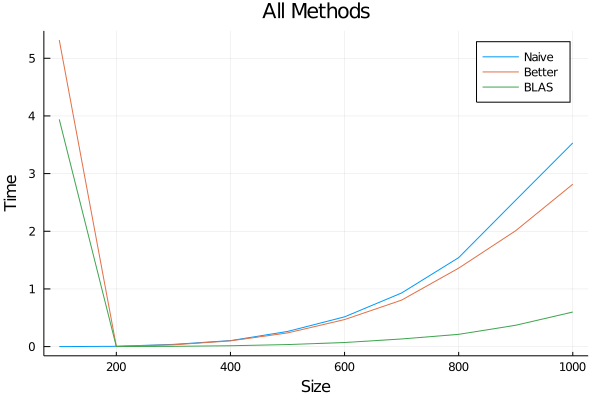

In [14]:
import Pkg; Pkg.add("Plots")
using Plots
plot(_size, naive_times, xlabel = "Size", ylabel="Time",title = "Naive", label="Naive")
plot!(_size, better_times, xlabel = "Size", ylabel="Time",title = "Better", label="Better")
plot!(_size, blas_times, xlabel = "Size", ylabel="Time",title = "All Methods", label="BLAS")

### Zadanie 3 Uzyc funkcji polyfit z pakietu Polynomials do dopasowania wielomianow do zaleznosci czasowych kazdego z algorytmow

In [15]:
x = [0,1,2,3,4,5,6,7,8]
y = [1,2,3,4,3,4,2,3,1]

9-element Array{Int64,1}:
 1
 2
 3
 4
 3
 4
 2
 3
 1

In [16]:
Pkg.add("Polynomials")
using Polynomials
naive_func = fit(_size, naive_times)

  Resolving package versions...
No Changes to `/opt/julia/environments/v1.5/Project.toml`
No Changes to `/opt/julia/environments/v1.5/Manifest.toml`


Polynomial(4.370665000000002 - 0.1193347316666667*x + 0.001301699931388889*x^2 - 7.609333909556881e-6*x^3 + 2.6674489694444453e-8*x^4 - 5.876841890625002e-11*x^5 + 8.210354027777781e-14*x^6 - 7.059175347222224e-17*x^7 + 3.406763888888889e-20*x^8 - 7.059366732804234e-24*x^9)

In [17]:
better_func = fit(_size, better_times)

Polynomial(49.886424000000005 - 0.9338441140079365*x + 0.007398474005793651*x^2 - 3.2674277019058645e-5*x^3 + 8.890458770833335e-8*x^4 - 1.549079986400463e-10*x^5 + 1.7322745e-13*x^6 - 1.2010212285052912e-16*x^7 + 4.6922123015873015e-20*x^8 - 7.881462191358026e-24*x^9)

In [18]:
blas_func = fit(_size, blas_times)

Polynomial(40.22674500000001 - 0.7831163979444447*x + 0.006506714699285716*x^2 - 3.0403352605379194e-5*x^3 + 8.833145786111113e-8*x^4 - 1.6592267359953704e-10*x^5 + 2.0197213611111114e-13*x^6 - 1.5392792824074073e-16*x^7 + 6.675849206349206e-20*x^8 - 1.257135692239859e-23*x^9)

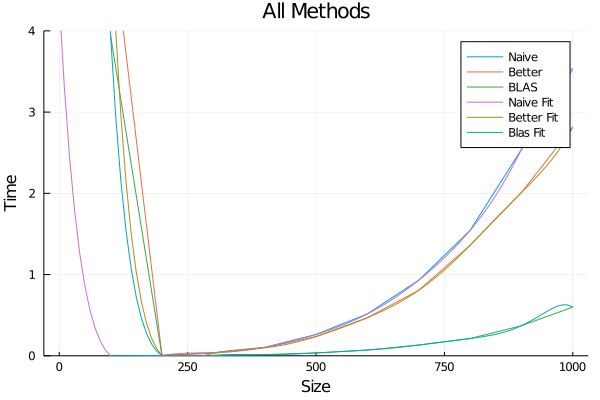

In [19]:
plot!(naive_func, 0, 1000, ylim=(0, 4), label="Naive Fit")
plot!(better_func, 0, 1000, ylim=(0, 4), label="Better Fit")
plot!(blas_func, 0, 1000, ylim=(0, 4),label="Blas Fit")

### Zadanie 4 Pokazać zniwelowanie efektu Rungego poprzez uzycie wsparcia dla wilomianow Czebyszewa

In [20]:
args = [i for i=-1:0.2:1]
vals = [1/(1+12x^2) for x in args]
func = fit(args, vals)

Polynomial(1.0 - 4.440892098500626e-16*x - 10.30280928015986*x^2 + 61.533031481100956*x^4 + 3.552713678800501e-14*x^5 - 175.24433553458832*x^6 + 219.00612971750823*x^8 - 1.4210854715202004e-14*x^9 - 95.91509330693792*x^10)

In [21]:
chebyshev = ChebyshevT(func)
nodes = Polynomials.roots(chebyshev)
nodes_vals = [1/(1+12x^2) for x in nodes]

1

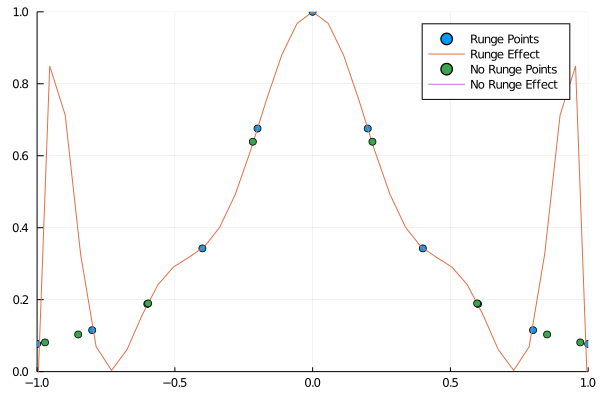

In [22]:
bet_func = fit(nodes, nodes_vals)
scatter(args, vals, label="Runge Points")
plot!(func, xlim=(-1, 1), ylim=(0, 1), label="Runge Effect")
scatter!(nodes, nodes_vals, label="No Runge Points")
plot!(bet_func, xlim=(-1, 1), ylim=(0, 1),label="No Runge Effect")

### Zadanie 5 Aproksymacja Pade